In [3]:
#Importing libraries needed for cleaning and visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Reading in the character working dataset
char = pd.read_csv('character.csv')
char.head()

,combat,durability,intelligence,name,power,speed,strength,base,id,occupation,relatives,aliases,alignment,alter-egos,full-name,publisher
0,64.0,80.0,38.0,A-Bomb,24.0,17.0,100.0,-,1,"Musician, adventurer, author; formerly talk sh...",Marlo Chandler-Jones (wife); Polly (aunt); Mrs...,['Rick Jones'],good,No alter egos found.,Richard Milhouse Jones,Marvel Comics
1,85.0,65.0,88.0,Abe Sapien,100.0,35.0,28.0,-,2,Paranormal Investigator,"Edith Howard (wife, deceased)","['Langdon Everett Caul', 'Abraham Sapien', 'La...",good,No alter egos found.,Abraham Sapien,Dark Horse Comics
2,65.0,64.0,50.0,Abin Sur,99.0,53.0,90.0,Oa,3,"Green Lantern, former history professor","Amon Sur (son), Arin Sur (sister), Thaal Sines...",['Lagzia'],good,No alter egos found.,NaN,DC Comics
3,95.0,90.0,63.0,Abomination,62.0,53.0,80.0,Mobile,4,Ex-Spy,"Nadia Dornova Blonsky (wife, separated)","['Agent R-7', 'Ravager of Worlds']",bad,No alter egos found.,Emil Blonsky,Marvel Comics
4,55.0,100.0,88.0,Abraxas,100.0,83.0,63.0,-,5,Dimensional destroyer,"Eternity (""Father"")",['-'],bad,No alter egos found.,Abraxas,Marvel Comics


In [5]:
#Vieweing columns from the data
cols = char.columns
cols

Index(['combat', 'durability', 'intelligence', 'name', 'power', 'speed',
       'strength', 'base', 'id', 'occupation', 'relatives', 'aliases',
       'alignment', 'alter-egos', 'full-name', 'publisher'],
      dtype='object')

In [6]:
#Shape of the DataFrame
char.shape

(774, 16)

In [7]:
#Descriptive Statistics
char.describe()

,combat,durability,intelligence,power,speed,strength,id
count,589.000000,589.000000,589.000000,589.000000,589.000000,658.000000,774.000000
mean,61.989813,59.417657,64.772496,64.584041,40.755518,44.528875,363.936693
std,23.239947,30.001906,19.949235,29.754183,24.380655,32.810603,213.341862
min,5.000000,1.000000,6.000000,0.000000,1.000000,4.000000,1.000000
25%,42.000000,30.000000,50.000000,38.000000,23.000000,11.000000,176.250000
50%,64.000000,60.000000,63.000000,64.000000,33.000000,37.000000,361.500000
75%,80.000000,90.000000,75.000000,100.000000,53.000000,80.000000,550.750000
max,101.000000,110.000000,100.000000,100.000000,100.000000,100.000000,732.000000


In [8]:
#Descriptive statistics for categorial data
char.describe(include = np.object)

,name,base,occupation,relatives,aliases,alignment,alter-egos,full-name,publisher
count,774,774,774,774,774,774,774,668,759
unique,713,284,386,459,481,4,75,594,88
top,Goliath,-,-,-,['-'],good,No alter egos found.,Hank Pym,Marvel Comics
freq,9,401,312,286,257,534,686,6,354


In [9]:
#Veiwing datatypes 
char.dtypes

combat          float64
durability      float64
intelligence    float64
name             object
power           float64
speed           float64
strength        float64
base             object
id                int64
occupation       object
relatives        object
aliases          object
alignment        object
alter-egos       object
full-name        object
publisher        object
dtype: object

In [10]:
char.isnull().sum()

combat          185
durability      185
intelligence    185
name              0
power           185
speed           185
strength        116
base              0
id                0
occupation        0
relatives         0
aliases           0
alignment         0
alter-egos        0
full-name       106
publisher        15
dtype: int64

In [11]:
powers_df = char[['combat', 'durability', 'intelligence', 'power', 'speed', 'strength']]
powers_df.head()

,combat,durability,intelligence,power,speed,strength
0,64.0,80.0,38.0,24.0,17.0,100.0
1,85.0,65.0,88.0,100.0,35.0,28.0
2,65.0,64.0,50.0,99.0,53.0,90.0
3,95.0,90.0,63.0,62.0,53.0,80.0
4,55.0,100.0,88.0,100.0,83.0,63.0


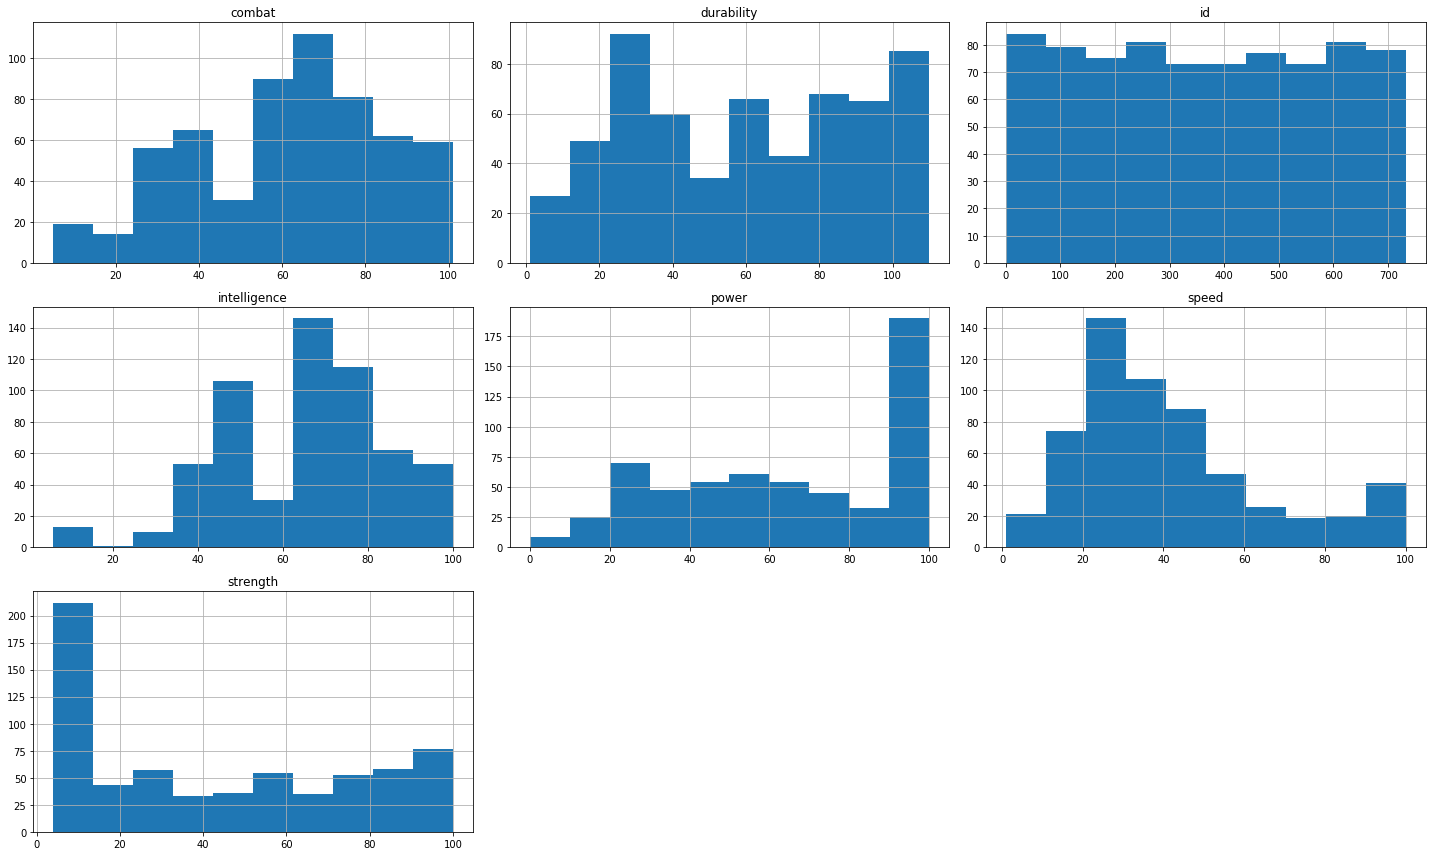

In [12]:
#Viewing the distribution of powers
char.hist(figsize = (20,12))
plt.tight_layout()
plt.show()

In [13]:
power_corr = powers_df.corr()
power_corr

,combat,durability,intelligence,power,speed,strength
combat,1.000000,0.203480,0.345729,0.135028,0.168606,0.234424
durability,0.203480,1.000000,0.194319,0.514578,0.482662,0.689928
intelligence,0.345729,0.194319,1.000000,0.247610,0.183029,0.199630
power,0.135028,0.514578,0.247610,1.000000,0.451180,0.459520
speed,0.168606,0.482662,0.183029,0.451180,1.000000,0.506935
strength,0.234424,0.689928,0.199630,0.459520,0.506935,1.000000


//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


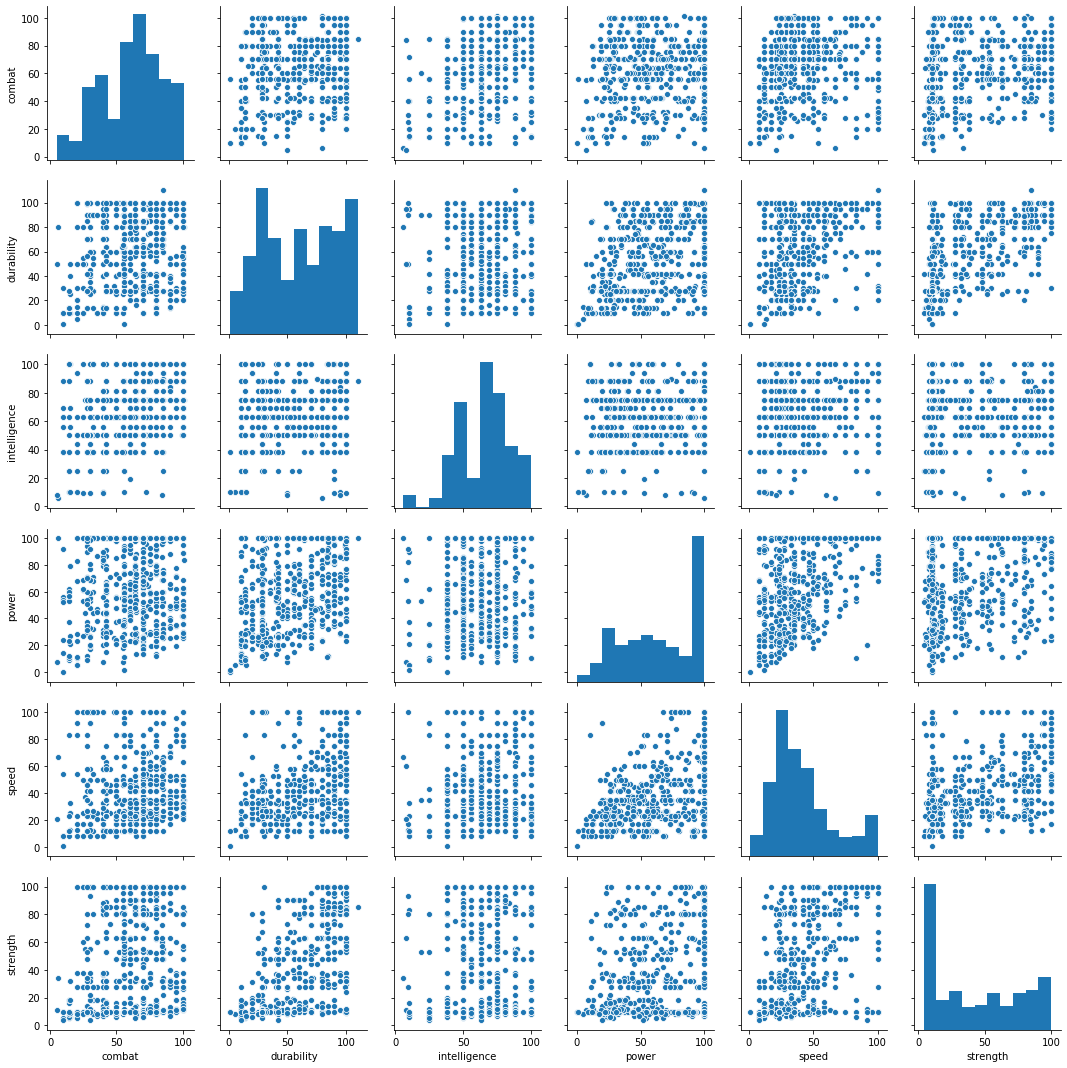

In [14]:
sns.pairplot(powers_df)

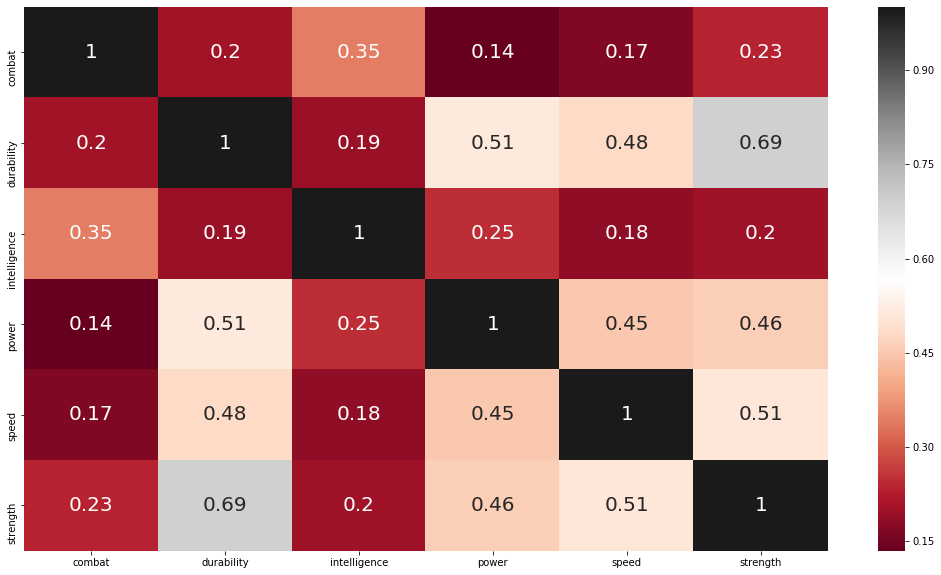

In [15]:
#Creating Subplots
plt.subplots(figsize = (18,10))
#Heatmap showing the correlation between powers 
sns.heatmap(power_corr, annot = True, annot_kws = {'size':20}, cmap="RdGy")

In [16]:
char.head()

,combat,durability,intelligence,name,power,speed,strength,base,id,occupation,relatives,aliases,alignment,alter-egos,full-name,publisher
0,64.0,80.0,38.0,A-Bomb,24.0,17.0,100.0,-,1,"Musician, adventurer, author; formerly talk sh...",Marlo Chandler-Jones (wife); Polly (aunt); Mrs...,['Rick Jones'],good,No alter egos found.,Richard Milhouse Jones,Marvel Comics
1,85.0,65.0,88.0,Abe Sapien,100.0,35.0,28.0,-,2,Paranormal Investigator,"Edith Howard (wife, deceased)","['Langdon Everett Caul', 'Abraham Sapien', 'La...",good,No alter egos found.,Abraham Sapien,Dark Horse Comics
2,65.0,64.0,50.0,Abin Sur,99.0,53.0,90.0,Oa,3,"Green Lantern, former history professor","Amon Sur (son), Arin Sur (sister), Thaal Sines...",['Lagzia'],good,No alter egos found.,NaN,DC Comics
3,95.0,90.0,63.0,Abomination,62.0,53.0,80.0,Mobile,4,Ex-Spy,"Nadia Dornova Blonsky (wife, separated)","['Agent R-7', 'Ravager of Worlds']",bad,No alter egos found.,Emil Blonsky,Marvel Comics
4,55.0,100.0,88.0,Abraxas,100.0,83.0,63.0,-,5,Dimensional destroyer,"Eternity (""Father"")",['-'],bad,No alter egos found.,Abraxas,Marvel Comics


In [17]:
#Creating a dataframe using only features and the outcome 
char = char[['name']  
         + ['alter-egos'] + ['relatives']
         + ['occupation'] + ['base'] + ['combat'] + ['speed']
         + ['intelligence'] + ['power'] + ['durability'] + ['strength'] 
         + ['publisher'] + ['alignment']]
char.head()

,name,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength,publisher,alignment
0,A-Bomb,No alter egos found.,Marlo Chandler-Jones (wife); Polly (aunt); Mrs...,"Musician, adventurer, author; formerly talk sh...",-,64.0,17.0,38.0,24.0,80.0,100.0,Marvel Comics,good
1,Abe Sapien,No alter egos found.,"Edith Howard (wife, deceased)",Paranormal Investigator,-,85.0,35.0,88.0,100.0,65.0,28.0,Dark Horse Comics,good
2,Abin Sur,No alter egos found.,"Amon Sur (son), Arin Sur (sister), Thaal Sines...","Green Lantern, former history professor",Oa,65.0,53.0,50.0,99.0,64.0,90.0,DC Comics,good
3,Abomination,No alter egos found.,"Nadia Dornova Blonsky (wife, separated)",Ex-Spy,Mobile,95.0,53.0,63.0,62.0,90.0,80.0,Marvel Comics,bad
4,Abraxas,No alter egos found.,"Eternity (""Father"")",Dimensional destroyer,-,55.0,83.0,88.0,100.0,100.0,63.0,Marvel Comics,bad


In [18]:
char.shape

(774, 13)

In [19]:
#Viewing the count for good guys and bad guys 
char['alignment'].value_counts()

good       534
bad        209
neutral     24
-            7
Name: alignment, dtype: int64

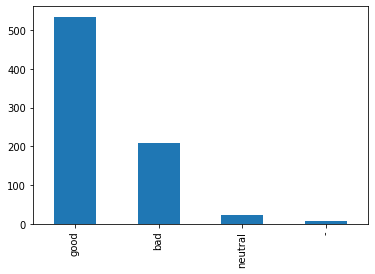

In [20]:
#Viewing the distribution for alignment
char['alignment'].value_counts().plot.bar()

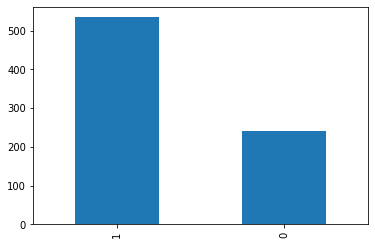

In [21]:
#Making the outcome, alignment, binary. 1 for good or 0 else
char['alignment'] = [1 if x == 'good' else 0 for x in char['alignment']]
char['alignment'].value_counts().plot.bar()

In [22]:
char.head(2)

,name,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength,publisher,alignment
0,A-Bomb,No alter egos found.,Marlo Chandler-Jones (wife); Polly (aunt); Mrs...,"Musician, adventurer, author; formerly talk sh...",-,64.0,17.0,38.0,24.0,80.0,100.0,Marvel Comics,1
1,Abe Sapien,No alter egos found.,"Edith Howard (wife, deceased)",Paranormal Investigator,-,85.0,35.0,88.0,100.0,65.0,28.0,Dark Horse Comics,1


In [82]:
# Assigning X as a DataFrame for the features and y as a Series of the outcome variable, Alignment
X = char.drop('alignment', 1)
y = char['alignment']

In [83]:
X.head()

,name,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength,publisher
0,A-Bomb,No alter egos found.,Marlo Chandler-Jones (wife); Polly (aunt); Mrs...,"Musician, adventurer, author; formerly talk sh...",-,64.0,17.0,38.0,24.0,80.0,100.0,Marvel Comics
1,Abe Sapien,No alter egos found.,"Edith Howard (wife, deceased)",Paranormal Investigator,-,85.0,35.0,88.0,100.0,65.0,28.0,Dark Horse Comics
2,Abin Sur,No alter egos found.,"Amon Sur (son), Arin Sur (sister), Thaal Sines...","Green Lantern, former history professor",Oa,65.0,53.0,50.0,99.0,64.0,90.0,DC Comics
3,Abomination,No alter egos found.,"Nadia Dornova Blonsky (wife, separated)",Ex-Spy,Mobile,95.0,53.0,63.0,62.0,90.0,80.0,Marvel Comics
4,Abraxas,No alter egos found.,"Eternity (""Father"")",Dimensional destroyer,-,55.0,83.0,88.0,100.0,100.0,63.0,Marvel Comics


## Exploring Alter Egos

In [84]:
X['alter-egos'].head()

0    No alter egos found.
1    No alter egos found.
2    No alter egos found.
3    No alter egos found.
4    No alter egos found.
Name: alter-egos, dtype: object

In [85]:
X['alter-egos'].nunique()

75

In [86]:
X['alter-egos'].unique()

array(['No alter egos found.', 'Sharon Carter', 'Archangel', 'Tempest',
       'Giant-Man, Goliath, Wasp II, Yellowjacket', 'Toxin, Venom',
       'Angel', 'Speedy', 'Goliath, Power Man, Smuggler', 'Spectre',
       'Oracle', 'Hawkfire', 'Huntress', 'Misfit', 'Spoiler',
       'Nightwing, Robin', 'Captain Marvel, Warbird', 'Vertigo II',
       'Meltdown', 'Gemini V', 'Binary, Warbird',
       'Evil Deadpool, Venompool', 'Deadpool, Venompool', 'Black Racer',
       'Speed Demon', 'Impulse, Kid Flash II',
       'Ant-Man, Goliath, Wasp II, Yellowjacket',
       'Atlas, Power Man, Smuggler', 'Hawkeye, Ronin',
       'Ant-Man, Giant-Man, Wasp II, Yellowjacket', 'Goliath, Ronin',
       'Batgirl III', 'Flash IV, Kid Flash II',
       'Phoenix, White Phoenix of The Crown', 'Liberty Belle II',
       'Power Woman', 'Iron Lad', 'Flash IV, Impulse', 'Power Man',
       'Boom-Boom', 'Batgirl V', 'She-Thing', 'Batman II, Robin',
       'Batgirl', 'Speedball', 'Jean Grey, White Phoenix of The Crow

In [87]:
X['alter-egos'].isnull().sum()

0

In [88]:
X['alter-egos'].value_counts()

No alter egos found.                         686
Ant-Man, Giant-Man, Wasp II, Yellowjacket      3
Atlas, Power Man, Smuggler                     3
Hawkeye, Ronin                                 3
Binary, Warbird                                2
Goliath, Power Man, Smuggler                   2
Anti-Venom, Venom                              2
Oracle                                         2
Hawkfire                                       2
Vindicator II                                  2
Archangel                                      2
Arsenal                                        2
Ant-Man, Goliath, Wasp II, Yellowjacket        1
Batman II, Robin                               1
Nightwing, Robin                               1
Speedy                                         1
Batgirl                                        1
Phoenix, White Phoenix of The Crown            1
Ms Marvel II                                   1
Jean Grey, White Phoenix of The Crown          1
Captain Marvel, Warb

In [89]:
#Making the alter-egos feature binary where 1 represents if the character has a known alter-ego and 0 else
X['alter-egos'] = [0 if x == 'No alter egos found.' else 1 for x in X['alter-egos']]
X.head()

,name,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength,publisher
0,A-Bomb,0,Marlo Chandler-Jones (wife); Polly (aunt); Mrs...,"Musician, adventurer, author; formerly talk sh...",-,64.0,17.0,38.0,24.0,80.0,100.0,Marvel Comics
1,Abe Sapien,0,"Edith Howard (wife, deceased)",Paranormal Investigator,-,85.0,35.0,88.0,100.0,65.0,28.0,Dark Horse Comics
2,Abin Sur,0,"Amon Sur (son), Arin Sur (sister), Thaal Sines...","Green Lantern, former history professor",Oa,65.0,53.0,50.0,99.0,64.0,90.0,DC Comics
3,Abomination,0,"Nadia Dornova Blonsky (wife, separated)",Ex-Spy,Mobile,95.0,53.0,63.0,62.0,90.0,80.0,Marvel Comics
4,Abraxas,0,"Eternity (""Father"")",Dimensional destroyer,-,55.0,83.0,88.0,100.0,100.0,63.0,Marvel Comics


In [90]:
X['alter-egos'].value_counts()

0    686
1     88
Name: alter-egos, dtype: int64

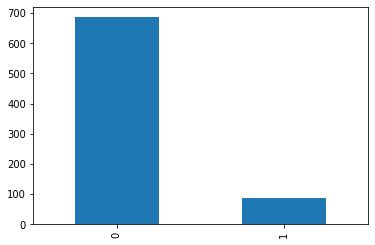

In [91]:
X['alter-egos'].value_counts().plot.bar()

In [92]:
X.head()

,name,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength,publisher
0,A-Bomb,0,Marlo Chandler-Jones (wife); Polly (aunt); Mrs...,"Musician, adventurer, author; formerly talk sh...",-,64.0,17.0,38.0,24.0,80.0,100.0,Marvel Comics
1,Abe Sapien,0,"Edith Howard (wife, deceased)",Paranormal Investigator,-,85.0,35.0,88.0,100.0,65.0,28.0,Dark Horse Comics
2,Abin Sur,0,"Amon Sur (son), Arin Sur (sister), Thaal Sines...","Green Lantern, former history professor",Oa,65.0,53.0,50.0,99.0,64.0,90.0,DC Comics
3,Abomination,0,"Nadia Dornova Blonsky (wife, separated)",Ex-Spy,Mobile,95.0,53.0,63.0,62.0,90.0,80.0,Marvel Comics
4,Abraxas,0,"Eternity (""Father"")",Dimensional destroyer,-,55.0,83.0,88.0,100.0,100.0,63.0,Marvel Comics


## Exploring Relatives

In [93]:
X['relatives'].head()

0    Marlo Chandler-Jones (wife); Polly (aunt); Mrs...
1                        Edith Howard (wife, deceased)
2    Amon Sur (son), Arin Sur (sister), Thaal Sines...
3              Nadia Dornova Blonsky (wife, separated)
4                                  Eternity ("Father")
Name: relatives, dtype: object

In [94]:
X['relatives'].nunique()

459

In [95]:
X['relatives'].unique()[0:5]

array(['Marlo Chandler-Jones (wife); Polly (aunt); Mrs. Chandler (mother-in-law); Keith Chandler, Ray Chandler, three unidentified others (brothers-in-law); unidentified father (deceased); Jackie Shorr (alleged mother; unconfirmed)',
       'Edith Howard (wife, deceased)',
       'Amon Sur (son), Arin Sur (sister), Thaal Sinestro (brother-in-law), Soranik Natu (niece)',
       'Nadia Dornova Blonsky (wife, separated)', 'Eternity ("Father")'],
      dtype=object)

In [96]:
X['relatives'].isnull().sum()

0

In [97]:
X['relatives'].value_counts()[0:2]

-                                                                                                                                                                                                    286
Richard Parker (father, deceased), Mary Parker(mother, deceased), Benjamin Parker (uncle, deceased), May Parker (aunt), Mary Jane Watson-Parker (wife), May Parker (daughter, allegedly deceased)      3
Name: relatives, dtype: int64

In [98]:
#Making the relatives feature binary where 1 represents relatives and 0 for no known relatives
X['relatives'] = [0 if x == '-' else 1 for x in X['relatives']]
X['relatives'].head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    0
7    1
8    1
9    1
Name: relatives, dtype: int64

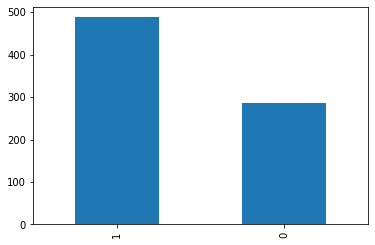

In [99]:
#Viewing the distribution of the new relatives feature
X['relatives'].value_counts().plot.bar()

## Exploring Occupation

In [100]:
X['occupation'].head()

0    Musician, adventurer, author; formerly talk sh...
1                              Paranormal Investigator
2              Green Lantern, former history professor
3                                               Ex-Spy
4                                Dimensional destroyer
Name: occupation, dtype: object

In [101]:
X['occupation'].nunique()

386

In [102]:
X['occupation'].unique()[0:3]

array(['Musician, adventurer, author; formerly talk show host',
       'Paranormal Investigator',
       'Green Lantern, former history professor'], dtype=object)

In [103]:
X['occupation'].isnull().sum()

0

In [104]:
X['occupation'].value_counts()

-                                                                                                                                                              312
Adventurer                                                                                                                                                      17
Student                                                                                                                                                         10
Scientist                                                                                                                                                        5
Professional criminal                                                                                                                                            4
Professional Criminal                                                                                                                                            4
Former National Aerona

In [105]:
#Making the occupation feature binary.  1 for known occupation, 0 for unkwown legal occupation
X['occupation'] = [0 if x == '-' else 1 for x in X['occupation']]
X['occupation'].head(15)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    0
13    0
14    0
Name: occupation, dtype: int64

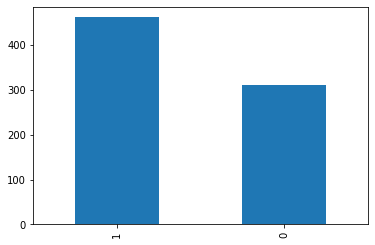

In [106]:
X['occupation'].value_counts().plot.bar()

In [107]:
X.head()

,name,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength,publisher
0,A-Bomb,0,1,1,-,64.0,17.0,38.0,24.0,80.0,100.0,Marvel Comics
1,Abe Sapien,0,1,1,-,85.0,35.0,88.0,100.0,65.0,28.0,Dark Horse Comics
2,Abin Sur,0,1,1,Oa,65.0,53.0,50.0,99.0,64.0,90.0,DC Comics
3,Abomination,0,1,1,Mobile,95.0,53.0,63.0,62.0,90.0,80.0,Marvel Comics
4,Abraxas,0,1,1,-,55.0,83.0,88.0,100.0,100.0,63.0,Marvel Comics


## Exploring Base

In [108]:
X['base'].head()

0         -
1         -
2        Oa
3    Mobile
4         -
Name: base, dtype: object

In [109]:
X['base'].nunique()

284

In [110]:
X['base'].value_counts()

-                                                                                                                                                                                                                                         401
Gotham City                                                                                                                                                                                                                                11
New York City                                                                                                                                                                                                                              10
Mobile                                                                                                                                                                                                                                      9
New York, New York                              

In [111]:
#Making the base feature binary.  1 for having a base, 0 for no known base
X['base'] = [0 if x == '-' else 1 for x in X['base']]
X['base'].head(5)

0    0
1    0
2    1
3    1
4    0
Name: base, dtype: int64

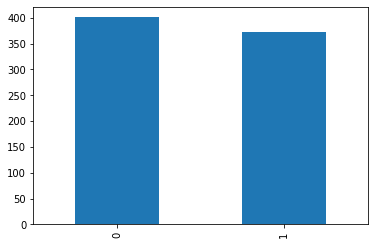

In [112]:
X['base'].value_counts().plot.bar()

### How much of the data is missing?

In [113]:
#How much of the remaining data is missing?
X.isnull().sum().sort_values(ascending=False)

durability      185
power           185
intelligence    185
speed           185
combat          185
strength        116
publisher        15
base              0
occupation        0
relatives         0
alter-egos        0
name              0
dtype: int64

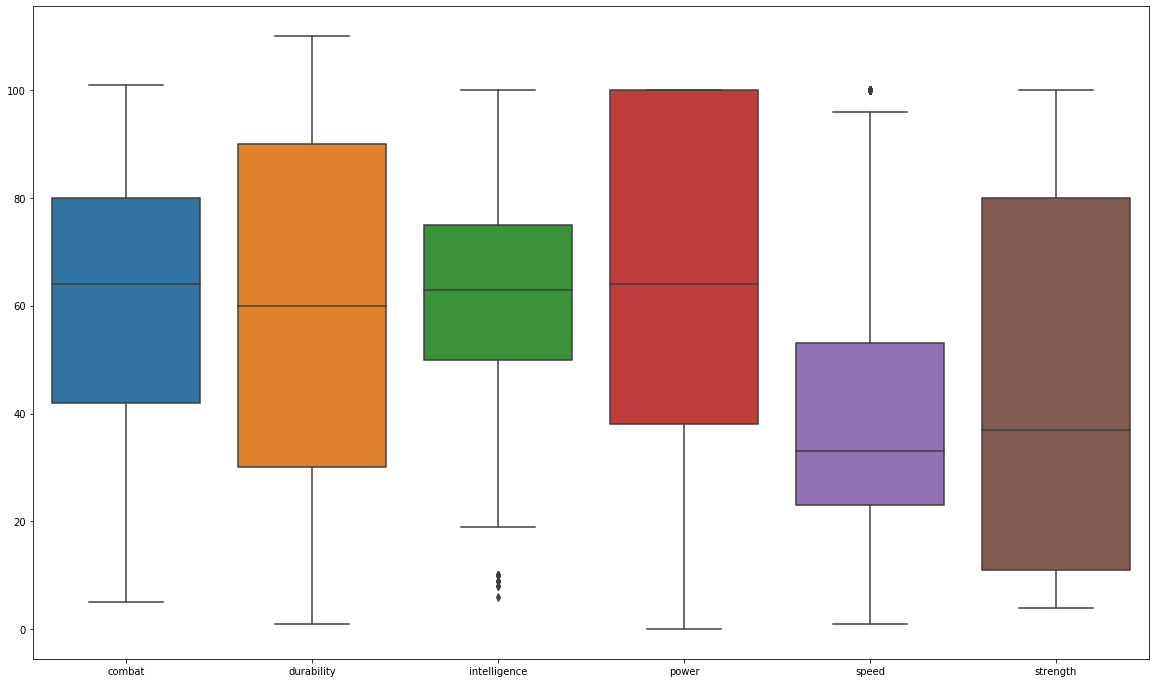

In [114]:
plt.subplots(figsize = (20,12))
sns.boxplot(data = powers_df)

In [115]:
#columns dropped for Imputation of values
dfi = X[['name', 'publisher']]
dfi.head()

,name,publisher
0,A-Bomb,Marvel Comics
1,Abe Sapien,Dark Horse Comics
2,Abin Sur,DC Comics
3,Abomination,Marvel Comics
4,Abraxas,Marvel Comics


In [116]:
X = X.drop(['name', 'publisher'], axis = 1)
X.head()

,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength
0,0,1,1,0,64.0,17.0,38.0,24.0,80.0,100.0
1,0,1,1,0,85.0,35.0,88.0,100.0,65.0,28.0
2,0,1,1,1,65.0,53.0,50.0,99.0,64.0,90.0
3,0,1,1,1,95.0,53.0,63.0,62.0,90.0,80.0
4,0,1,1,0,55.0,83.0,88.0,100.0,100.0,63.0


In [117]:
todummy_list = []
todummy_list.append('publisher')

In [118]:
todummy_list

['publisher']

In [120]:
from sklearn.impute import SimpleImputer
imp_median = SimpleImputer(missing_values = np.nan, strategy = 'median')
imp_median.fit(X)
X = pd.DataFrame(data = imp_median.transform(X) , columns=X.columns)
X.head(5)

,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength
0,0.0,1.0,1.0,0.0,64.0,17.0,38.0,24.0,80.0,100.0
1,0.0,1.0,1.0,0.0,85.0,35.0,88.0,100.0,65.0,28.0
2,0.0,1.0,1.0,1.0,65.0,53.0,50.0,99.0,64.0,90.0
3,0.0,1.0,1.0,1.0,95.0,53.0,63.0,62.0,90.0,80.0
4,0.0,1.0,1.0,0.0,55.0,83.0,88.0,100.0,100.0,63.0


In [140]:
X.isnull().sum().sort_values(ascending=False)

publisher       0
strength        0
durability      0
power           0
intelligence    0
speed           0
combat          0
base            0
occupation      0
relatives       0
alter-egos      0
dtype: int64

## Exploring Publisher

In [122]:
X.head()

,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength
0,0.0,1.0,1.0,0.0,64.0,17.0,38.0,24.0,80.0,100.0
1,0.0,1.0,1.0,0.0,85.0,35.0,88.0,100.0,65.0,28.0
2,0.0,1.0,1.0,1.0,65.0,53.0,50.0,99.0,64.0,90.0
3,0.0,1.0,1.0,1.0,95.0,53.0,63.0,62.0,90.0,80.0
4,0.0,1.0,1.0,0.0,55.0,83.0,88.0,100.0,100.0,63.0


In [123]:
dfi['publisher'].nunique()

88

In [124]:
dfi['publisher'].unique()

array(['Marvel Comics', 'Dark Horse Comics', 'DC Comics', 'NBC - Heroes',
       'Sharon Carter', 'Wildstorm', 'Archangel', 'Tempest',
       'Image Comics', 'Giant-Man', 'Toxin', 'Angel', 'Speedy', nan,
       'Goliath', 'Spectre', 'Oracle', 'Hawkfire', 'Huntress', 'Misfit',
       'Spoiler', 'Nightwing', 'Icon Comics', 'SyFy', 'Captain Marvel',
       'Hanna-Barbera', 'Vertigo II', 'George Lucas', 'Meltdown',
       'Gemini V', 'Team Epic TV', 'South Park', 'Binary',
       'HarperCollins', 'ABC Studios', 'Universal Studios', 'Star Trek',
       'Evil Deadpool', 'IDW Publishing', 'Deadpool', 'Black Racer',
       'Speed Demon', 'Impulse', 'Ant-Man', 'Shueisha', 'Atlas',
       'Hawkeye', 'Sony Pictures', 'J. K. Rowling', 'Batgirl III',
       'Flash IV', 'Titan Books', 'Phoenix', 'Liberty Belle II',
       'Power Woman', 'Rebellion', 'Iron Lad', 'Power Man', 'Microsoft',
       'Boom-Boom', 'Batgirl V', 'She-Thing', 'Batman II', 'Batgirl',
       'Speedball', 'Jean Grey', 'Luke Cage'

In [125]:
dfi['publisher'].value_counts()[0:7]

Marvel Comics        354
DC Comics            201
Dark Horse Comics     19
NBC - Heroes          18
Image Comics          14
George Lucas          14
Star Trek              6
Name: publisher, dtype: int64

In [126]:
#Splitting the publisher feature into 3 categories  1 for having a base, 0 for no known base
dfi['publisher'] = [0 if x == 'Marvel Comics' else 1 if x == 'DC Comics' else 2 for x in dfi['publisher']]
dfi['publisher'].head()

0    0
1    2
2    1
3    0
4    0
Name: publisher, dtype: int64

In [128]:
X['publisher'] = dfi['publisher']
X.head()

,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength,publisher
0,0.0,1.0,1.0,0.0,64.0,17.0,38.0,24.0,80.0,100.0,0
1,0.0,1.0,1.0,0.0,85.0,35.0,88.0,100.0,65.0,28.0,2
2,0.0,1.0,1.0,1.0,65.0,53.0,50.0,99.0,64.0,90.0,1
3,0.0,1.0,1.0,1.0,95.0,53.0,63.0,62.0,90.0,80.0,0
4,0.0,1.0,1.0,0.0,55.0,83.0,88.0,100.0,100.0,63.0,0


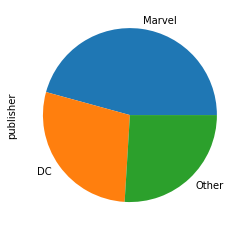

In [129]:
X['publisher'].value_counts().plot.pie(labels = ['Marvel','DC','Other'])

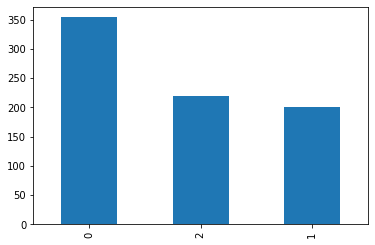

In [130]:
X['publisher'].value_counts().plot.bar()

In [131]:
todummy_list

['publisher']

In [256]:
# Function to dummy the publishers
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

## Adding the Overall Stat

In [133]:
X_real = X
X_real.head()

,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength,publisher
0,0.0,1.0,1.0,0.0,64.0,17.0,38.0,24.0,80.0,100.0,0
1,0.0,1.0,1.0,0.0,85.0,35.0,88.0,100.0,65.0,28.0,2
2,0.0,1.0,1.0,1.0,65.0,53.0,50.0,99.0,64.0,90.0,1
3,0.0,1.0,1.0,1.0,95.0,53.0,63.0,62.0,90.0,80.0,0
4,0.0,1.0,1.0,0.0,55.0,83.0,88.0,100.0,100.0,63.0,0


In [142]:
X_real['overall'] = X_real['combat'] + X_real['speed'] + X_real['intelligence'] + X_real['power'] + X_real['durability'] + X_real['strength']
X_real['overall']

0      323.0
1      401.0
2      421.0
3      443.0
4      489.0
5      405.0
6      349.0
7      239.0
8      330.0
9       61.0
10     388.0
11     460.0
12     308.0
13     388.0
14     412.0
15     321.0
16     162.0
17     327.0
18     321.0
19     546.0
20     321.0
21     321.0
22     428.0
23     256.0
24     428.0
25     256.0
26     205.0
27     220.0
28     381.0
29     389.0
       ...  
744    491.0
745    321.0
746    464.0
747    234.0
748    337.0
749    261.0
750    492.0
751    321.0
752    257.0
753    321.0
754    324.0
755    332.0
756    321.0
757    199.0
758    434.0
759    369.0
760    446.0
761    567.0
762    321.0
763     90.0
764    391.0
765    473.0
766    321.0
767    164.0
768    182.0
769    403.0
770    388.0
771    298.0
772    316.0
773    492.0
Name: overall, Length: 774, dtype: float64

In [144]:
X_real.head()

,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength,publisher,overall
0,0.0,1.0,1.0,0.0,64.0,17.0,38.0,24.0,80.0,100.0,0,323.0
1,0.0,1.0,1.0,0.0,85.0,35.0,88.0,100.0,65.0,28.0,2,401.0
2,0.0,1.0,1.0,1.0,65.0,53.0,50.0,99.0,64.0,90.0,1,421.0
3,0.0,1.0,1.0,1.0,95.0,53.0,63.0,62.0,90.0,80.0,0,443.0
4,0.0,1.0,1.0,0.0,55.0,83.0,88.0,100.0,100.0,63.0,0,489.0


In [260]:
X = X_real
X.head()

,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength,publisher,overall
0,0.0,1.0,1.0,0.0,64.0,17.0,38.0,24.0,80.0,100.0,0,323.0
1,0.0,1.0,1.0,0.0,85.0,35.0,88.0,100.0,65.0,28.0,2,401.0
2,0.0,1.0,1.0,1.0,65.0,53.0,50.0,99.0,64.0,90.0,1,421.0
3,0.0,1.0,1.0,1.0,95.0,53.0,63.0,62.0,90.0,80.0,0,443.0
4,0.0,1.0,1.0,0.0,55.0,83.0,88.0,100.0,100.0,63.0,0,489.0


In [261]:
X.shape

(774, 12)

In [262]:
todummy_list

['publisher']

In [263]:
X = dummy_df(X, todummy_list)
X.head()

,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength,publisher,overall
0,0.0,1.0,1.0,0.0,64.0,17.0,38.0,24.0,80.0,100.0,0,323.0
1,0.0,1.0,1.0,0.0,85.0,35.0,88.0,100.0,65.0,28.0,2,401.0
2,0.0,1.0,1.0,1.0,65.0,53.0,50.0,99.0,64.0,90.0,1,421.0
3,0.0,1.0,1.0,1.0,95.0,53.0,63.0,62.0,90.0,80.0,0,443.0
4,0.0,1.0,1.0,0.0,55.0,83.0,88.0,100.0,100.0,63.0,0,489.0


In [150]:
#Histogram function

def plot_histogram(x):
    plt.hist(x, color = 'green')
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

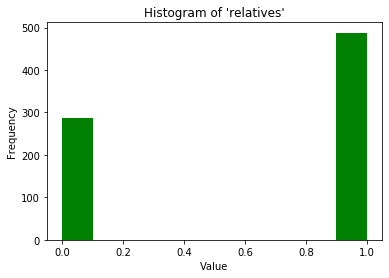

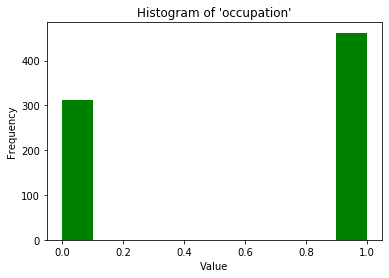

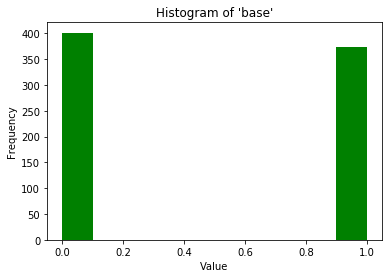

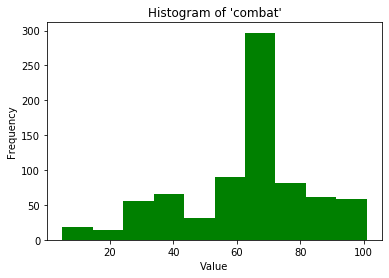

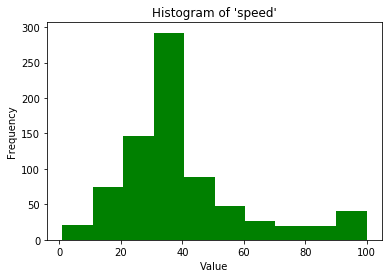

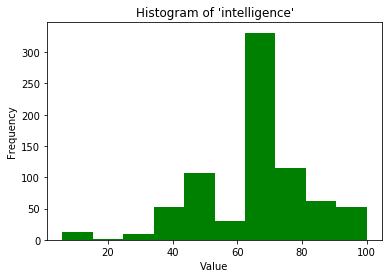

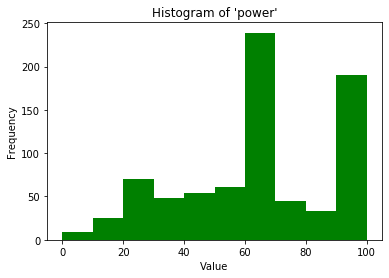

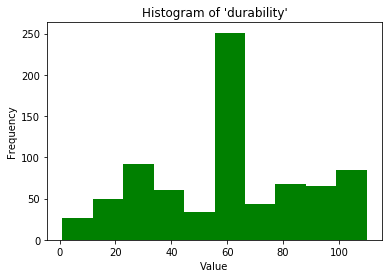

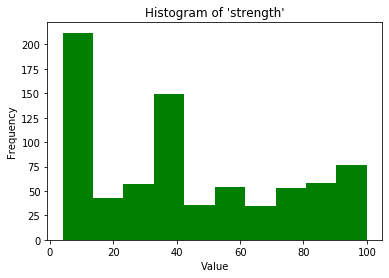

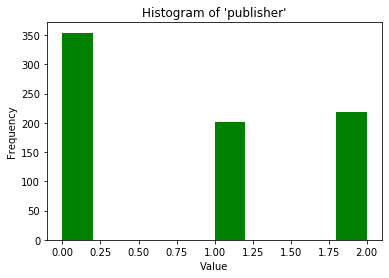

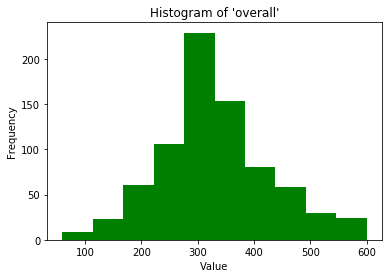

In [152]:
plot_histogram(X_real['relatives'])
plot_histogram(X_real['occupation'])
plot_histogram(X_real['base'])
plot_histogram(X_real['combat'])
plot_histogram(X_real['speed'])
plot_histogram(X_real['intelligence'])
plot_histogram(X_real['power'])
plot_histogram(X_real['durability'])
plot_histogram(X_real['strength'])
plot_histogram(X_real['publisher'])
plot_histogram(X_real['overall'])

In [154]:
# Plot histograms to show distribution of features by outcome categories
def plot_histogram_dv(x,y):
    plt.hist(list(x[y==0]), color = 'blue', label='Outcome=0', alpha= 0.5, stacked = True, density = True)
    plt.hist(list(x[y==1]), color = 'red', label ='Outcome=1', alpha= 0.3, stacked = True, density = True)
    plt.title("Histogram of '{var_name}' by Outcome Category".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend(loc='upper right')
    plt.show()

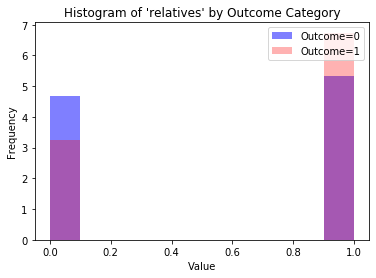

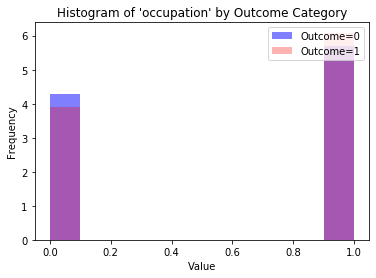

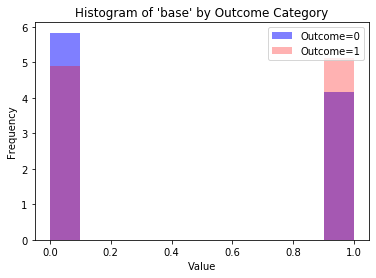

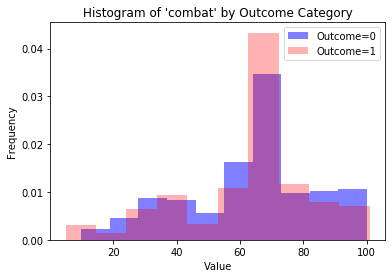

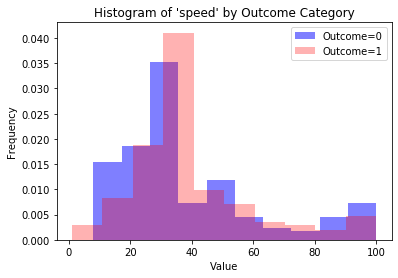

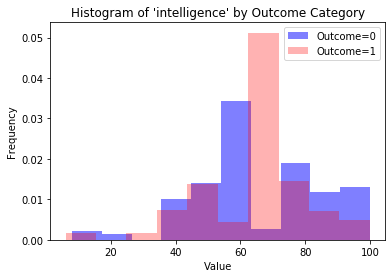

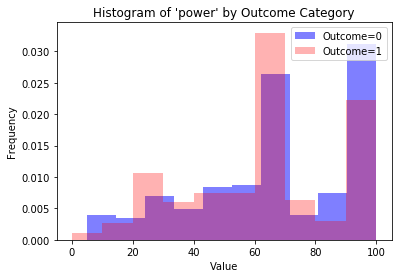

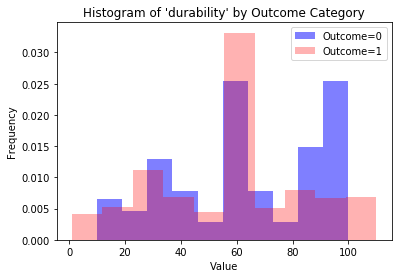

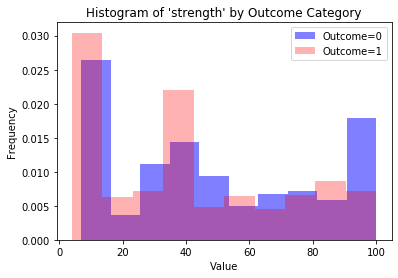

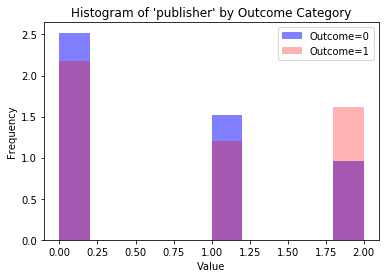

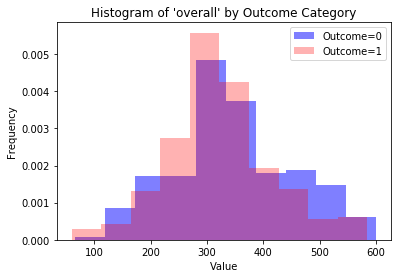

In [155]:
plot_histogram_dv(X['relatives'], y)
plot_histogram_dv(X['occupation'], y)
plot_histogram_dv(X['base'], y)
plot_histogram_dv(X['combat'], y)
plot_histogram_dv(X['speed'], y)
plot_histogram_dv(X['intelligence'], y)
plot_histogram_dv(X['power'], y)
plot_histogram_dv(X['durability'], y)
plot_histogram_dv(X['strength'], y)
plot_histogram_dv(X_real['publisher'], y)
plot_histogram_dv(X_real['overall'], y)

In [264]:
X.head()

,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength,publisher,overall
0,0.0,1.0,1.0,0.0,64.0,17.0,38.0,24.0,80.0,100.0,0,323.0
1,0.0,1.0,1.0,0.0,85.0,35.0,88.0,100.0,65.0,28.0,2,401.0
2,0.0,1.0,1.0,1.0,65.0,53.0,50.0,99.0,64.0,90.0,1,421.0
3,0.0,1.0,1.0,1.0,95.0,53.0,63.0,62.0,90.0,80.0,0,443.0
4,0.0,1.0,1.0,0.0,55.0,83.0,88.0,100.0,100.0,63.0,0,489.0


## Creating New Features

In [172]:
# Use PolynomialFeatures in sklearn.preprocessing to create two-way interactions for all features
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

def add_interactions(df):
    # Get feature names
    combos = list(combinations(list(df.columns), 2))
    colnames = list(df.columns) + ['_'.join(x) for x in combos]
    
    # Find interactions
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    df = poly.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames
    
    # Remove interaction terms with all 0 values            
    noint_indicies = [i for i, x in enumerate(list((df == 0).all())) if x]
    df = df.drop(df.columns[noint_indicies], axis=1)
    
    return df

In [202]:
X = add_interactions(X)
X.head()

,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength,...,power_durability,power_strength,power_publisher,power_overall,durability_strength,durability_publisher,durability_overall,strength_publisher,strength_overall,publisher_overall
0,0.0,1.0,1.0,0.0,64.0,17.0,38.0,24.0,80.0,100.0,...,1920.0,2400.0,0.0,7752.0,8000.0,0.0,25840.0,0.0,32300.0,0.0
1,0.0,1.0,1.0,0.0,85.0,35.0,88.0,100.0,65.0,28.0,...,6500.0,2800.0,200.0,40100.0,1820.0,130.0,26065.0,56.0,11228.0,802.0
2,0.0,1.0,1.0,1.0,65.0,53.0,50.0,99.0,64.0,90.0,...,6336.0,8910.0,99.0,41679.0,5760.0,64.0,26944.0,90.0,37890.0,421.0
3,0.0,1.0,1.0,1.0,95.0,53.0,63.0,62.0,90.0,80.0,...,5580.0,4960.0,0.0,27466.0,7200.0,0.0,39870.0,0.0,35440.0,0.0
4,0.0,1.0,1.0,0.0,55.0,83.0,88.0,100.0,100.0,63.0,...,10000.0,6300.0,0.0,48900.0,6300.0,0.0,48900.0,0.0,30807.0,0.0


In [226]:
X.shape

(774, 12)

In [266]:
X_powers.isnull().sum()

combat          0
durability      0
intelligence    0
power           0
speed           0
strength        0
dtype: int64

In [265]:
imp_median = SimpleImputer(missing_values = np.nan, strategy = 'median')
imp_median.fit(powers_df)
X_powers = pd.DataFrame(data = imp_median.transform(powers_df) , columns=powers_df.columns)
X_powers.head()

,combat,durability,intelligence,power,speed,strength
0,64.0,80.0,38.0,24.0,17.0,100.0
1,85.0,65.0,88.0,100.0,35.0,28.0
2,65.0,64.0,50.0,99.0,53.0,90.0
3,95.0,90.0,63.0,62.0,53.0,80.0
4,55.0,100.0,88.0,100.0,83.0,63.0


In [267]:
#Adding interactions for continuous variables, (powerstats)
X_powers_interactions = add_interactions(X_powers)
X_powers_interactions.head()

,combat,durability,intelligence,power,speed,strength,combat_durability,combat_intelligence,combat_power,combat_speed,...,durability_intelligence,durability_power,durability_speed,durability_strength,intelligence_power,intelligence_speed,intelligence_strength,power_speed,power_strength,speed_strength
0,64.0,80.0,38.0,24.0,17.0,100.0,5120.0,2432.0,1536.0,1088.0,...,3040.0,1920.0,1360.0,8000.0,912.0,646.0,3800.0,408.0,2400.0,1700.0
1,85.0,65.0,88.0,100.0,35.0,28.0,5525.0,7480.0,8500.0,2975.0,...,5720.0,6500.0,2275.0,1820.0,8800.0,3080.0,2464.0,3500.0,2800.0,980.0
2,65.0,64.0,50.0,99.0,53.0,90.0,4160.0,3250.0,6435.0,3445.0,...,3200.0,6336.0,3392.0,5760.0,4950.0,2650.0,4500.0,5247.0,8910.0,4770.0
3,95.0,90.0,63.0,62.0,53.0,80.0,8550.0,5985.0,5890.0,5035.0,...,5670.0,5580.0,4770.0,7200.0,3906.0,3339.0,5040.0,3286.0,4960.0,4240.0
4,55.0,100.0,88.0,100.0,83.0,63.0,5500.0,4840.0,5500.0,4565.0,...,8800.0,10000.0,8300.0,6300.0,8800.0,7304.0,5544.0,8300.0,6300.0,5229.0


In [270]:
x = X_powers_interactions
x.head()

,combat,durability,intelligence,power,speed,strength,combat_durability,combat_intelligence,combat_power,combat_speed,...,durability_intelligence,durability_power,durability_speed,durability_strength,intelligence_power,intelligence_speed,intelligence_strength,power_speed,power_strength,speed_strength
0,64.0,80.0,38.0,24.0,17.0,100.0,5120.0,2432.0,1536.0,1088.0,...,3040.0,1920.0,1360.0,8000.0,912.0,646.0,3800.0,408.0,2400.0,1700.0
1,85.0,65.0,88.0,100.0,35.0,28.0,5525.0,7480.0,8500.0,2975.0,...,5720.0,6500.0,2275.0,1820.0,8800.0,3080.0,2464.0,3500.0,2800.0,980.0
2,65.0,64.0,50.0,99.0,53.0,90.0,4160.0,3250.0,6435.0,3445.0,...,3200.0,6336.0,3392.0,5760.0,4950.0,2650.0,4500.0,5247.0,8910.0,4770.0
3,95.0,90.0,63.0,62.0,53.0,80.0,8550.0,5985.0,5890.0,5035.0,...,5670.0,5580.0,4770.0,7200.0,3906.0,3339.0,5040.0,3286.0,4960.0,4240.0
4,55.0,100.0,88.0,100.0,83.0,63.0,5500.0,4840.0,5500.0,4565.0,...,8800.0,10000.0,8300.0,6300.0,8800.0,7304.0,5544.0,8300.0,6300.0,5229.0


In [280]:
X.shape, X_powers_interactions.shape

((774, 12), (774, 21))

In [278]:
X.head()

,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength,publisher,overall
0,0.0,1.0,1.0,0.0,64.0,17.0,38.0,24.0,80.0,100.0,0,323.0
1,0.0,1.0,1.0,0.0,85.0,35.0,88.0,100.0,65.0,28.0,2,401.0
2,0.0,1.0,1.0,1.0,65.0,53.0,50.0,99.0,64.0,90.0,1,421.0
3,0.0,1.0,1.0,1.0,95.0,53.0,63.0,62.0,90.0,80.0,0,443.0
4,0.0,1.0,1.0,0.0,55.0,83.0,88.0,100.0,100.0,63.0,0,489.0


In [293]:
X = pd.concat([X,X_powers_interactions], axis=1, ignore_index = False)
X.head()

,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength,...,durability_intelligence,durability_power,durability_speed,durability_strength,intelligence_power,intelligence_speed,intelligence_strength,power_speed,power_strength,speed_strength
0,0.0,1.0,1.0,0.0,64.0,17.0,38.0,24.0,80.0,100.0,...,3040.0,1920.0,1360.0,8000.0,912.0,646.0,3800.0,408.0,2400.0,1700.0
1,0.0,1.0,1.0,0.0,85.0,35.0,88.0,100.0,65.0,28.0,...,5720.0,6500.0,2275.0,1820.0,8800.0,3080.0,2464.0,3500.0,2800.0,980.0
2,0.0,1.0,1.0,1.0,65.0,53.0,50.0,99.0,64.0,90.0,...,3200.0,6336.0,3392.0,5760.0,4950.0,2650.0,4500.0,5247.0,8910.0,4770.0
3,0.0,1.0,1.0,1.0,95.0,53.0,63.0,62.0,90.0,80.0,...,5670.0,5580.0,4770.0,7200.0,3906.0,3339.0,5040.0,3286.0,4960.0,4240.0
4,0.0,1.0,1.0,0.0,55.0,83.0,88.0,100.0,100.0,63.0,...,8800.0,10000.0,8300.0,6300.0,8800.0,7304.0,5544.0,8300.0,6300.0,5229.0


In [309]:
X.shape

(774, 33)

In [312]:
X = dummy_df(X, todummy_list)
X.head()

,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength,...,durability_strength,intelligence_power,intelligence_speed,intelligence_strength,power_speed,power_strength,speed_strength,publisher_0,publisher_1,publisher_2
0,0.0,1.0,1.0,0.0,64.0,17.0,38.0,24.0,80.0,100.0,...,8000.0,912.0,646.0,3800.0,408.0,2400.0,1700.0,1,0,0
1,0.0,1.0,1.0,0.0,85.0,35.0,88.0,100.0,65.0,28.0,...,1820.0,8800.0,3080.0,2464.0,3500.0,2800.0,980.0,0,0,1
2,0.0,1.0,1.0,1.0,65.0,53.0,50.0,99.0,64.0,90.0,...,5760.0,4950.0,2650.0,4500.0,5247.0,8910.0,4770.0,0,1,0
3,0.0,1.0,1.0,1.0,95.0,53.0,63.0,62.0,90.0,80.0,...,7200.0,3906.0,3339.0,5040.0,3286.0,4960.0,4240.0,1,0,0
4,0.0,1.0,1.0,0.0,55.0,83.0,88.0,100.0,100.0,63.0,...,6300.0,8800.0,7304.0,5544.0,8300.0,6300.0,5229.0,1,0,0


In [313]:
X.shape

(774, 35)

In [314]:
X_cols = X.columns
X_cols

Index(['alter-egos', 'relatives', 'occupation', 'base', 'combat', 'speed',
       'intelligence', 'power', 'durability', 'strength', 'overall', 'combat',
       'durability', 'intelligence', 'power', 'speed', 'strength',
       'combat_durability', 'combat_intelligence', 'combat_power',
       'combat_speed', 'combat_strength', 'durability_intelligence',
       'durability_power', 'durability_speed', 'durability_strength',
       'intelligence_power', 'intelligence_speed', 'intelligence_strength',
       'power_speed', 'power_strength', 'speed_strength', 'publisher_0',
       'publisher_1', 'publisher_2'],
      dtype='object')

## Principal Component Analysis

In [ ]:
# Use PCA from sklearn.decompostion to find principal components
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_pca = pd.DataFrame(pca.fit_transform(X))

In [237]:
len(y)

774

In [315]:
X['y'] = y
X.head()

,alter-egos,relatives,occupation,base,combat,speed,intelligence,power,durability,strength,...,intelligence_power,intelligence_speed,intelligence_strength,power_speed,power_strength,speed_strength,publisher_0,publisher_1,publisher_2,y
0,0.0,1.0,1.0,0.0,64.0,17.0,38.0,24.0,80.0,100.0,...,912.0,646.0,3800.0,408.0,2400.0,1700.0,1,0,0,1
1,0.0,1.0,1.0,0.0,85.0,35.0,88.0,100.0,65.0,28.0,...,8800.0,3080.0,2464.0,3500.0,2800.0,980.0,0,0,1,1
2,0.0,1.0,1.0,1.0,65.0,53.0,50.0,99.0,64.0,90.0,...,4950.0,2650.0,4500.0,5247.0,8910.0,4770.0,0,1,0,1
3,0.0,1.0,1.0,1.0,95.0,53.0,63.0,62.0,90.0,80.0,...,3906.0,3339.0,5040.0,3286.0,4960.0,4240.0,1,0,0,0
4,0.0,1.0,1.0,0.0,55.0,83.0,88.0,100.0,100.0,63.0,...,8800.0,7304.0,5544.0,8300.0,6300.0,5229.0,1,0,0,0


In [324]:
X.shape

(774, 36)

In [323]:
X.to_csv('testing_dataset.csv', index = False)